In [1]:
from pathlib import Path
database_folder = 'data/database/'
Path (database_folder+'TorontoRestaurantReviewDatabase.db').touch()

In [2]:
import sqlite3

conn = sqlite3.connect(database_folder+'TorontoRestaurantReviewDatabase.db') #,detect_types=0
c = conn.cursor()

In [3]:
query = '''SELECT name FROM sqlite_master WHERE type = 'table' ORDER BY name '''

def printSchema(connection):
    connection.execute(query)
    for (tableName,) in connection.fetchall():
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))


printSchema(c)

cuisine:
  0: place_id(TEXT)
  1: name_google(TEXT)
  2: category_tripAdvisor_1(TEXT)
  3: category_tripAdvisor_2(TEXT)
location:
  0: place_id(TEXT)
  1: formatted_address(TEXT)
  2: lattitude(REAL)
  3: longtitude(REAL)
  4: city(TEXT)
  5: postalCode(TEXT)
responses:
  0: review_id(TEXT)
  1: text(TEXT)
  2: place_id(TEXT)
restaurants:
  0: place_id(TEXT)
  1: name_tripAdvisor(TEXT)
  2: rank_tripAdvisor(INTEGER)
  3: name_google(TEXT)
  4: cuisine(TEXT)
  5: retrieve_date(TEXT)
  6: rating_tripAdvisor(TEXT)
  7: rating_google(REAL)
  8: status(TEXT)
  9: review_count(INTEGER)
reviews:
  0: review_id(TEXT)
  1: user_id(TEXT)
  2: rating(REAL)
  3: text(TEXT)
  4: date_retrieved(TEXT)
  5: date_relative(TEXT)
  6: place_id(TEXT)
web:
  0: place_id(TEXT)
  1: url_googleMaps(TEXT)


In [4]:
query = '''
SELECT rest.name_google as name,
       status,
       city,
       category_tripAdvisor_1 as restType_1,
       category_tripAdvisor_2 as restType_2
FROM   
    restaurants as rest 
    INNER JOIN location as loc ON rest.place_id = loc.place_id
    INNER JOIN cuisine ON rest.place_id = cuisine.place_id
    ; ''' #AND status = 'OPERATIONAL'

# 
#        

c.execute(query)
c.fetchall()

[('Goodfellas Wood Oven Pizza', 'OPERATIONAL', 'York', 'Italian', 'Pizza'),
 ("Moxie's Grill & Bar", 'OPERATIONAL', 'Toronto', 'Grill', 'Bar'),
 ('New Orleans Seafood & Steakhouse',
  'OPERATIONAL',
  'York',
  'Steakhouse',
  'Cajun & Creole'),
 ('Scaramouche Restaurant',
  'OPERATIONAL',
  'Toronto',
  'French',
  'International'),
 ('Alo', 'OPERATIONAL', 'Toronto', 'French', 'European'),
 ('The Tilted Dog Pub & Kitchen', 'OPERATIONAL', 'Toronto', 'Bar', 'Pub'),
 ('LaVinia Restaurant',
  'OPERATIONAL',
  'Etobicoke',
  'Mediterranean',
  'Spanish'),
 ('RASA', 'OPERATIONAL', 'Toronto', 'Canadian', 'International'),
 ('PAI', 'OPERATIONAL', 'Toronto', 'Asian', 'Thai'),
 ('Richmond Station', 'OPERATIONAL', 'Toronto', 'American', 'International'),
 ('Jacobs', 'OPERATIONAL', 'Toronto', 'American', 'Steakhouse'),
 ('Jacques Bistro Du Parc',
  'CLOSED_PERMANENTLY',
  'Toronto',
  'French',
  'European'),
 ('Miku Toronto', 'OPERATIONAL', 'Toronto', 'Sushi', 'Japanese'),
 ("Michael's On Simcoe

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [6]:
pd_new = pd.read_sql(query, conn)
pd_new

,name,status,city,restType_1,restType_2
0,Goodfellas Wood Oven Pizza,OPERATIONAL,York,Italian,Pizza
1,Moxie's Grill & Bar,OPERATIONAL,Toronto,Grill,Bar
2,New Orleans Seafood & Steakhouse,OPERATIONAL,York,Steakhouse,Cajun & Creole
3,Scaramouche Restaurant,OPERATIONAL,Toronto,French,International
4,Alo,OPERATIONAL,Toronto,French,European
...,...,...,...,...,...
2163,Simit the big bagel,OPERATIONAL,Scarborough,Cafe,Turkish
2164,Fancy Franks,OPERATIONAL,Toronto,Canadian,Fast food
2165,Watermark Restaurant,OPERATIONAL,Niagara Falls,Italian,American
2166,Marzitelli,OPERATIONAL,Ottawa,Italian,French


C:\Users\hajih\Anaconda3\envs\NLP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

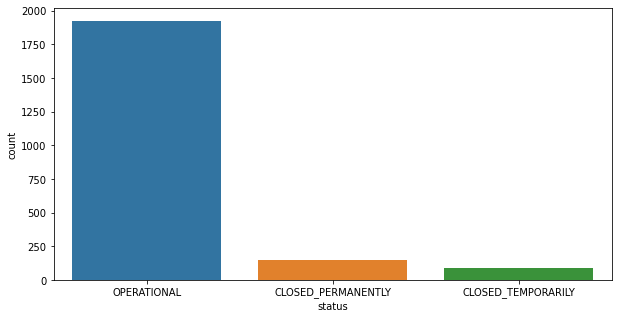

In [7]:
fig, ax = plt.subplots(figsize=(10,5));
sns.countplot(pd_new['status'],ax = ax)

In [20]:
cities = set(pd_new['city'])
for city in cities:
    if len(pd_new[pd_new.city==city]) >= 50:
        print (f'num of restaurants in {city}: {len(pd_new[pd_new.city==city])}')

num of restaurants in Toronto: 1575
num of restaurants in North York: 172
num of restaurants in Scarborough: 115
num of restaurants in Etobicoke: 148


In [21]:
types = set(pd_new['restType_1'])
types
# for tp in types:
#     if len(pd_new[pd_new.city==city]) >= 10:
#         print (f'num of restaurants in {city}: {len(pd_new[pd_new.city==city])}')

{'$',
 '$$ - $$$',
 '$$$$',
 'Afghani',
 'African',
 'American',
 'Arabic',
 'Argentinian',
 'Asian',
 'Austrian',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Cafe',
 'Cajun & Creole',
 'Canadian',
 'Caribbean',
 'Chinese',
 'Contemporary',
 'Deli',
 'Diner',
 'Dutch',
 'Eastern European',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast food',
 'French',
 'Fusion',
 'Gastropub',
 'German',
 'Greek',
 'Grill',
 'Healthy',
 'Indian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Latin',
 'Lebanese',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Moroccan',
 'Native American',
 'None',
 'Pakistani',
 'Persian',
 'Peruvian',
 'Philippine',
 'Pizza',
 'Polish',
 'Portuguese',
 'Pub',
 'Russian',
 'Seafood',
 'Singaporean',
 'Soups',
 'South American',
 'Spanish',
 'Sri Lankan',
 'Steakhouse',
 'Sushi',
 'Taiwanese',
 'Thai',
 'Turkish',
 'Ukrainian',
 'Uzbek',
 'Venezuelan',
 'Vietnamese',
 'Wine Bar'}

<AxesSubplot:xlabel='city', ylabel='count'>

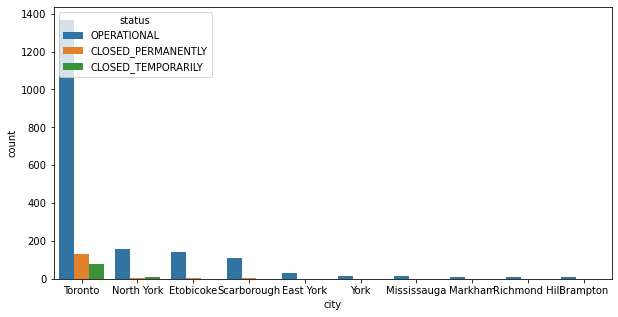

In [22]:
fig, ax = plt.subplots(figsize=(10,5));

sns.countplot(x="city", hue="status", data=pd_new,
              order=pd_new.city.value_counts().iloc[:10].index)


In [11]:
# fig, ax = plt.subplots(figsize=(10,5));
pd_2 = pd_new.copy()
# sns.countplot(x="city", hue="restType", data=pd_new,
#               order=pd_new.city.value_counts().iloc[:6].index)


In [23]:
for i in  ['$','$$ - $$$', '$$$$']:
    pd_2 = pd_2[pd_2['restType_1']!=i]#
set(pd_2.restType_1)

{'Afghani',
 'African',
 'American',
 'Arabic',
 'Argentinian',
 'Asian',
 'Austrian',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Cafe',
 'Cajun & Creole',
 'Canadian',
 'Caribbean',
 'Chinese',
 'Contemporary',
 'Deli',
 'Diner',
 'Dutch',
 'Eastern European',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast food',
 'French',
 'Fusion',
 'Gastropub',
 'German',
 'Greek',
 'Grill',
 'Healthy',
 'Indian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Latin',
 'Lebanese',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Moroccan',
 'Native American',
 'None',
 'Pakistani',
 'Persian',
 'Peruvian',
 'Philippine',
 'Pizza',
 'Polish',
 'Portuguese',
 'Pub',
 'Russian',
 'Seafood',
 'Singaporean',
 'Soups',
 'South American',
 'Spanish',
 'Sri Lankan',
 'Steakhouse',
 'Sushi',
 'Taiwanese',
 'Thai',
 'Turkish',
 'Ukrainian',
 'Uzbek',
 'Venezuelan',
 'Vietnamese',
 'Wine Bar'}

Text(0.5, 1.0, 'First Type')

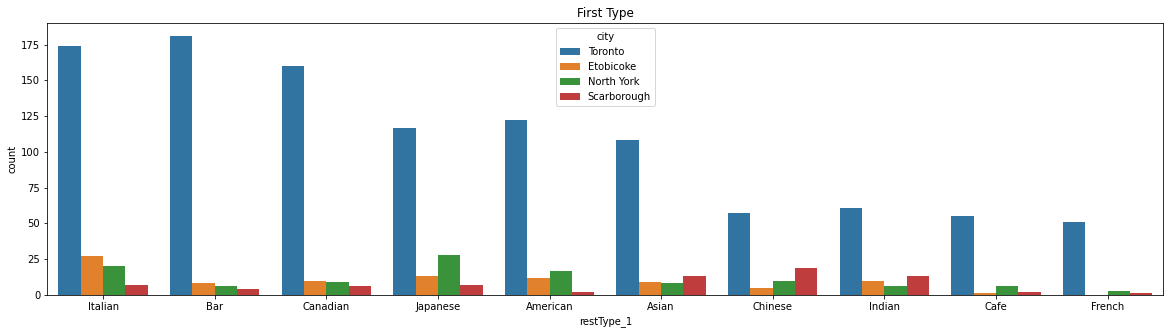

In [24]:
cities = ['Toronto','North York','Etobicoke','Scarborough']
pd_2 = (pd_2[(pd_2['city'] == 'Toronto') | (pd_2['city'] == 'North York') | (pd_2['city'] == 'Etobicoke') |
             (pd_2['city'] == 'Scarborough')])
fig, ax = plt.subplots(figsize=(20,5));

sns.countplot(x="restType_1",  hue = 'city', data=pd_2, order=pd_2.restType_1.value_counts().iloc[:10].index)
plt.title ('First Type')

Text(0.5, 1.0, 'Second Type')

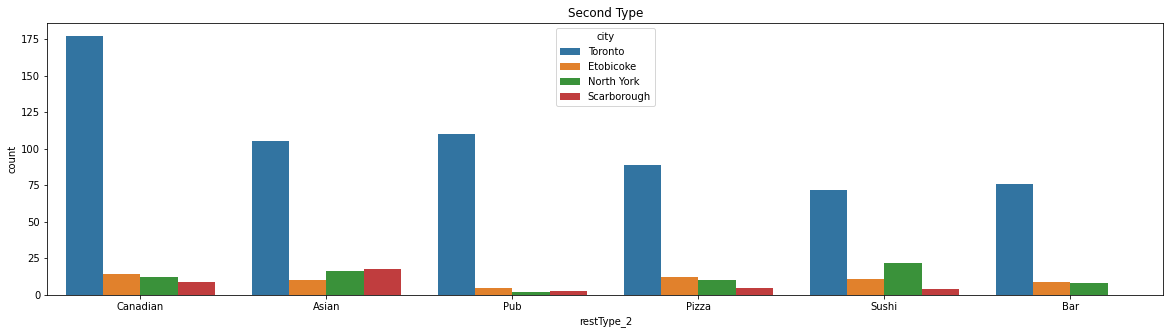

In [25]:
cities = ['Toronto','North York','Etobicoke','Scarborough']
pd_2 = (pd_2[(pd_2['city'] == 'Toronto') | (pd_2['city'] == 'North York') | (pd_2['city'] == 'Etobicoke') |
             (pd_2['city'] == 'Scarborough')])
fig, ax = plt.subplots(figsize=(20,5));

sns.countplot(x="restType_2",  hue = 'city', data=pd_2, order=pd_2.restType_2.value_counts().iloc[:6].index)
plt.title ('Second Type')

C:\Users\hajih\Anaconda3\envs\NLP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hajih\Anaconda3\envs\NLP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hajih\Anaconda3\envs\NLP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

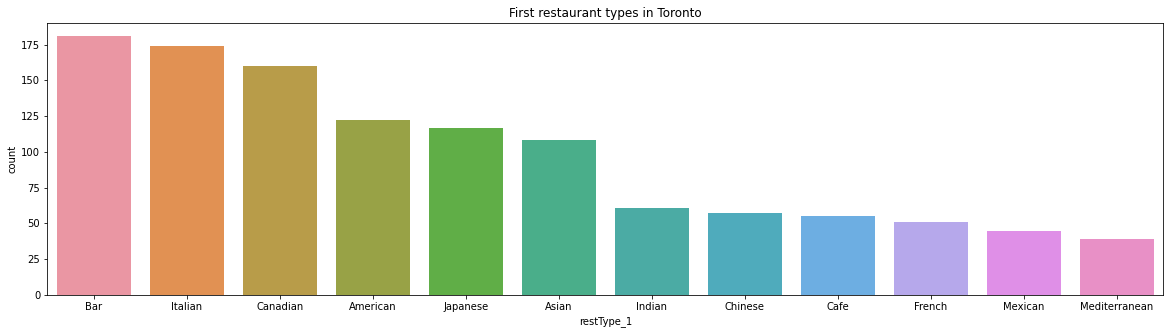

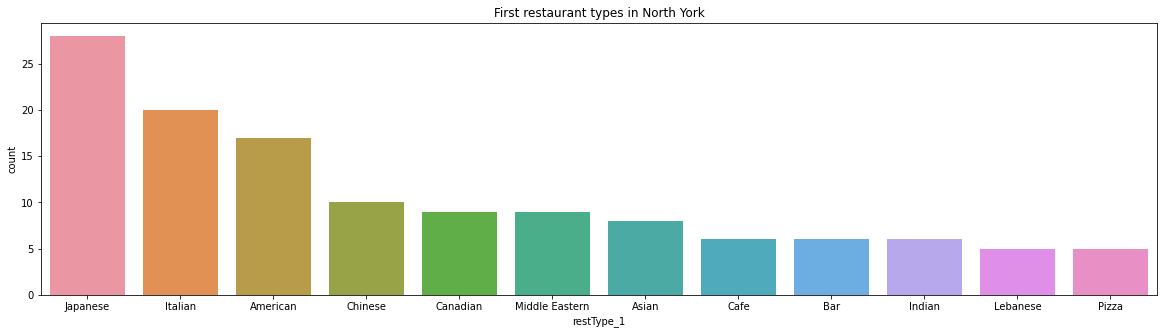

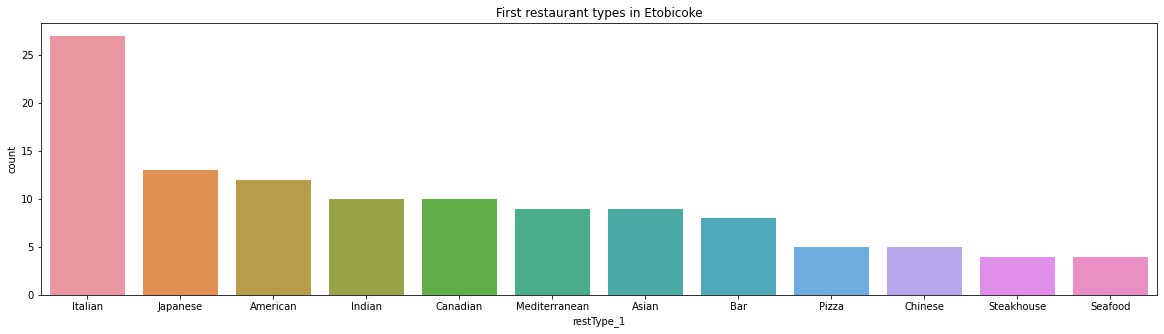

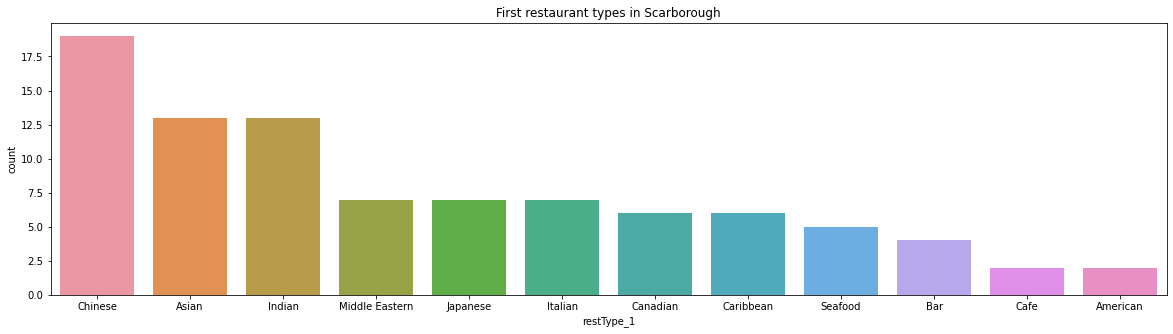

In [26]:
for city in cities:
    fig, ax = plt.subplots(figsize=(20,5));

    sns.countplot(pd_2[pd_2.city == city]['restType_1'], order=pd_2[pd_2.city == city]['restType_1'].value_counts().iloc[:12].index)
    plt.title ('First restaurant types in '+city)

C:\Users\hajih\Anaconda3\envs\NLP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hajih\Anaconda3\envs\NLP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hajih\Anaconda3\envs\NLP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

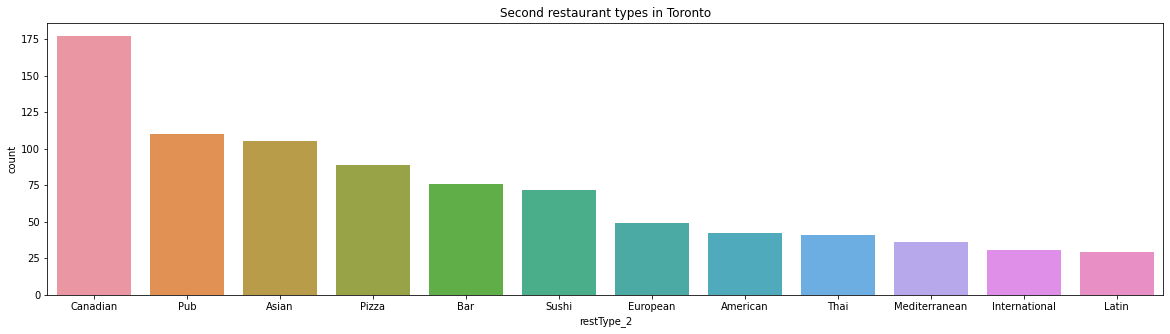

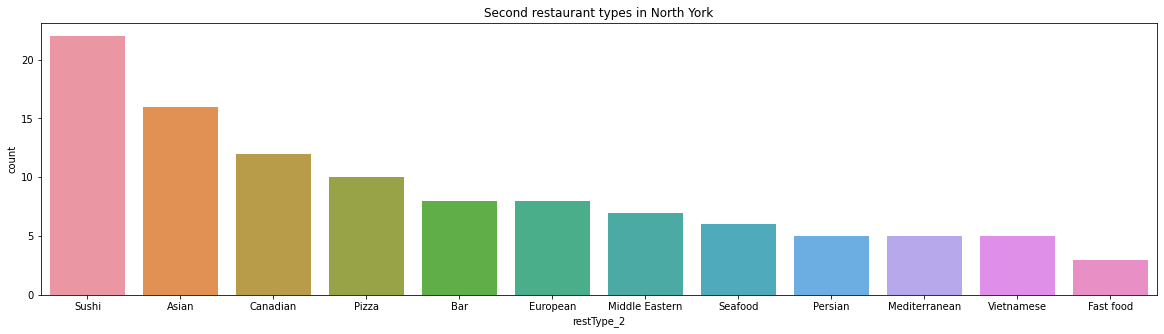

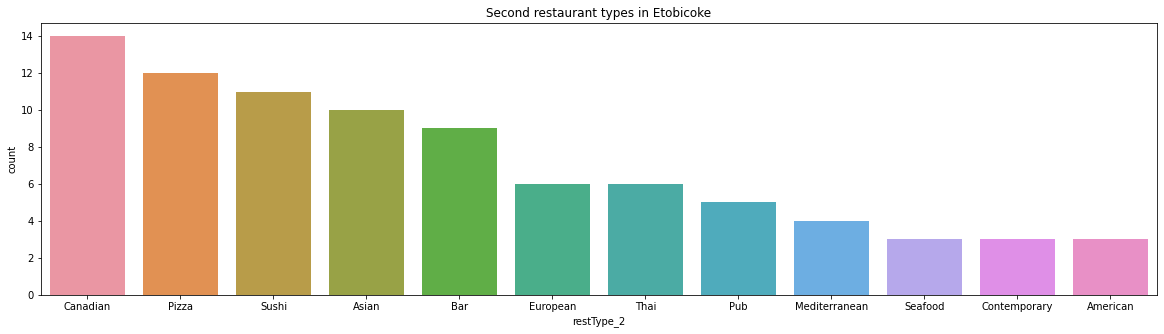

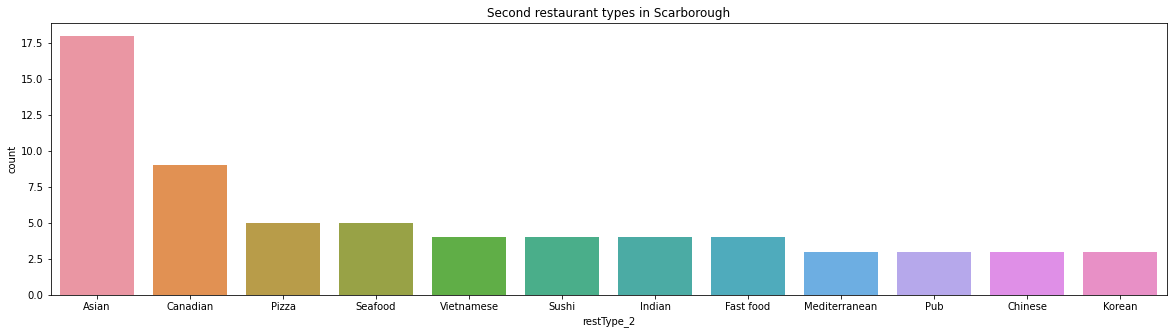

In [27]:
for city in cities:
    fig, ax = plt.subplots(figsize=(20,5));

    sns.countplot(pd_2[pd_2.city == city]['restType_2'], order=pd_2[pd_2.city == city]['restType_2'].value_counts().iloc[:12].index)
    plt.title ('Second restaurant types in '+city)

In [138]:
query = '''
SELECT rest.name_google as name,
       rest.status,
       loc.city,
       cuisine.category_tripAdvisor_1 as restType_1,
       cuisine.category_tripAdvisor_2 as restType_2,
       rest.rating_google,
       rest.review_count
       
FROM   
    restaurants as rest 
    INNER JOIN location as loc ON rest.place_id = loc.place_id
    INNER JOIN cuisine ON rest.place_id = cuisine.place_id
    ; ''' #AND status = 'OPERATIONAL'
# responses:
#   0: review_id(TEXT)
#   1: responded(INTEGER)
#   2: text(TEXT)
#   3: place_id(TEXT)

# 
#        

c.execute(query)
c.fetchall()

[('Goodfellas Wood Oven Pizza',
  'OPERATIONAL',
  'York',
  'Italian',
  'Pizza',
  4.3,
  902),
 ("Moxie's Grill & Bar", 'OPERATIONAL', 'Toronto', 'Grill', 'Bar', 4.0, 1634),
 ('New Orleans Seafood & Steakhouse',
  'OPERATIONAL',
  'York',
  'Steakhouse',
  'Cajun & Creole',
  4.8,
  587),
 ('Scaramouche Restaurant',
  'OPERATIONAL',
  'Toronto',
  'French',
  'International',
  4.7,
  992),
 ('Alo', 'OPERATIONAL', 'Toronto', 'French', 'European', 4.7, 1353),
 ('The Tilted Dog Pub & Kitchen',
  'OPERATIONAL',
  'Toronto',
  'Bar',
  'Pub',
  4.5,
  404),
 ('LaVinia Restaurant',
  'OPERATIONAL',
  'Etobicoke',
  'Mediterranean',
  'Spanish',
  4.6,
  418),
 ('RASA', 'OPERATIONAL', 'Toronto', 'Canadian', 'International', 4.6, 591),
 ('PAI', 'OPERATIONAL', 'Toronto', 'Asian', 'Thai', 4.6, 8817),
 ('Richmond Station',
  'OPERATIONAL',
  'Toronto',
  'American',
  'International',
  4.7,
  2281),
 ('Jacobs', 'OPERATIONAL', 'Toronto', 'American', 'Steakhouse', 3.0, 2),
 ('Jacques Bistro Du

In [139]:
pd_1 = pd.read_sql(query, conn)


In [134]:
pd_1.columns

Index(['name', 'status', 'city', 'restType_1', 'restType_2', 'rating_google',
       'review_count', 'ratingBins'],
      dtype='object')

In [140]:
pd_1[pd_1['rating_google'].isna()]

,name,status,city,restType_1,restType_2,rating_google,review_count
301,Oliver,None,None,Italian,Canadian,NaN,0
1773,Dundas,None,Hamilton,Canadian,Cafe,NaN,0
1791,Chiang Mai,None,Mueang Chiang Mai District,$$ - $$$,None,NaN,0
2053,Moxie's Grill & Bar,OPERATIONAL,Toronto,Grill,Bar,NaN,1844
2054,Citrus Medical Centre - Lake Shore,OPERATIONAL,Toronto,Canadian,International,NaN,94
...,...,...,...,...,...,...,...
2163,Simit the big bagel,OPERATIONAL,Scarborough,Cafe,Turkish,NaN,22
2164,Fancy Franks,OPERATIONAL,Toronto,Canadian,Fast food,NaN,405
2165,Watermark Restaurant,OPERATIONAL,Niagara Falls,Italian,American,NaN,259
2166,Marzitelli,OPERATIONAL,Ottawa,Italian,French,NaN,118


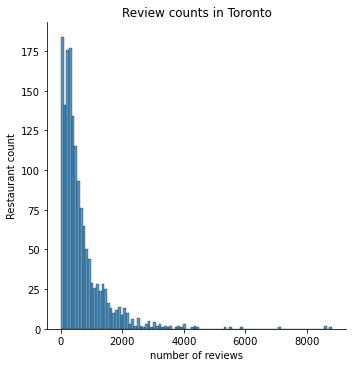

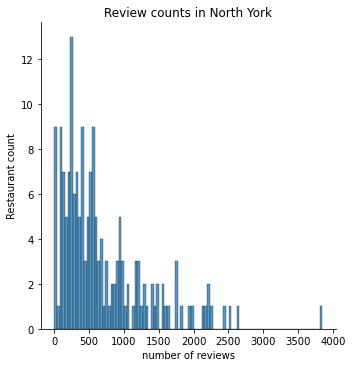

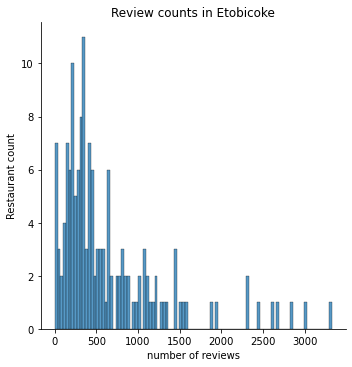

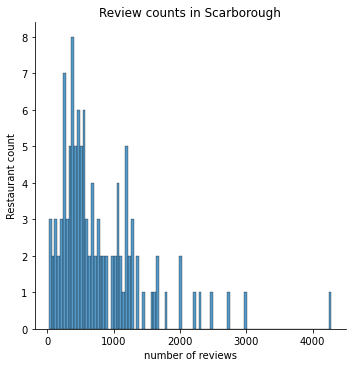

In [32]:
for city in cities:
#     fig, ax = plt.subplots(figsize=(20,5));

    sns.displot(pd_1[pd_1.city == city]['review_count'],bins=100)
    plt.title ('Review counts in '+city)
    plt.ylabel('Restaurant count')
    plt.xlabel('number of reviews')


In [33]:
pd_1.restType_2[pd_1.review_count == max(pd_1['review_count'])]


2157    Canadian
Name: restType_2, dtype: object

In [35]:
pd_1.name[(pd_1.city == 'Scarborough') & (pd_1.review_count>4000)]

169    Fishman Lobster Clubhouse Restaurant 魚樂軒
Name: name, dtype: object

In [36]:
pd_1.name[(pd_1.city == 'North York') & (pd_1.review_count>3000)]

384    Dragon Pearl Buffet
Name: name, dtype: object

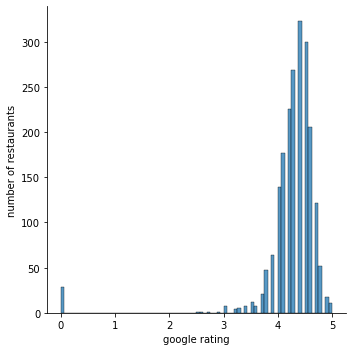

In [40]:
sns.displot(pd_1['rating_google'])
plt.ylabel('number of restaurants');
plt.xlabel('google rating');

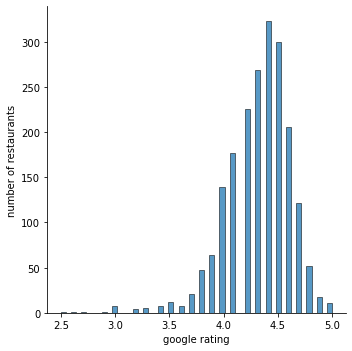

In [41]:
pd_1 = pd_1[pd_1.rating_google>.5]
sns.displot(pd_1['rating_google'])
plt.ylabel('number of restaurants');
plt.xlabel('google rating');

In [43]:
min(pd_1.rating_google)

2.5

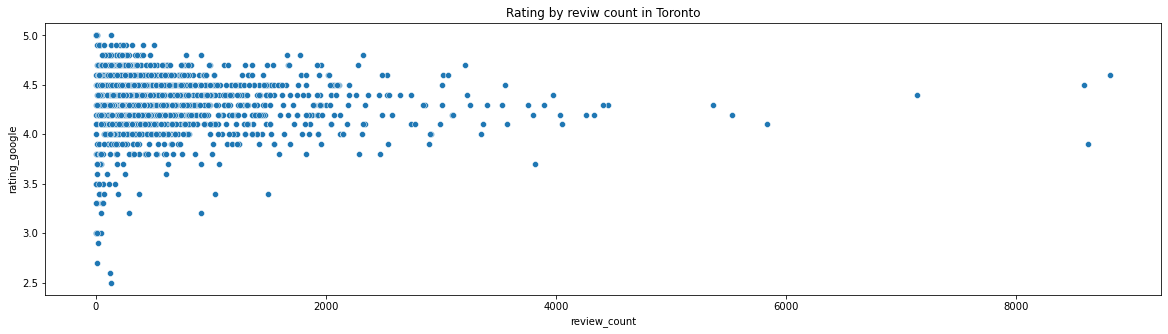

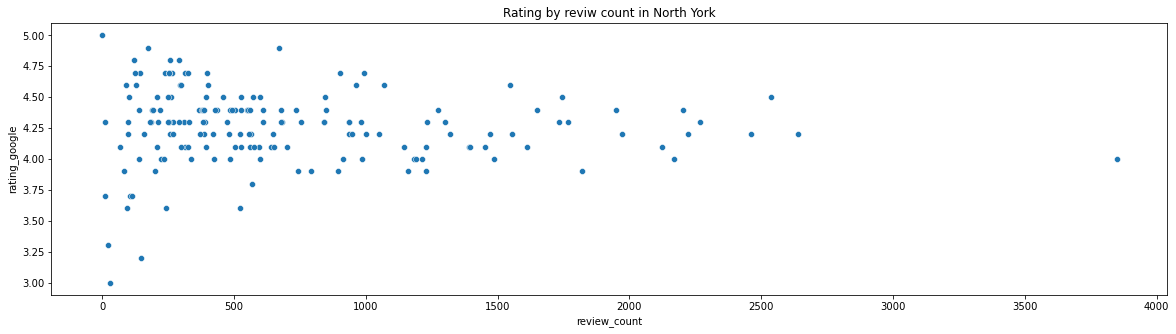

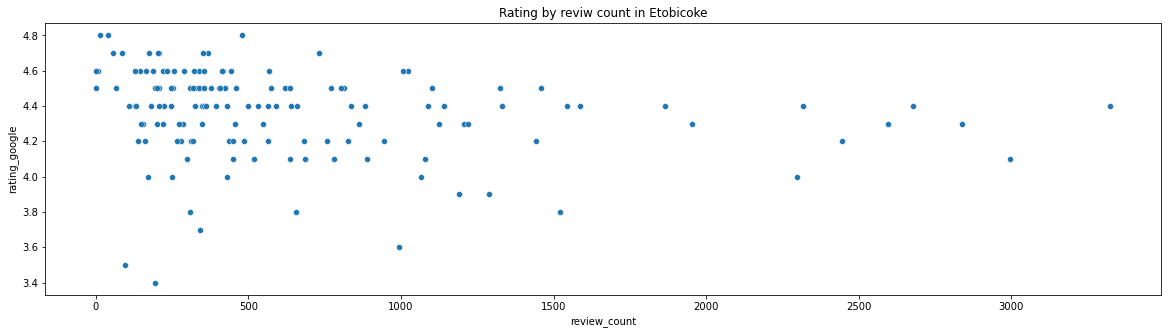

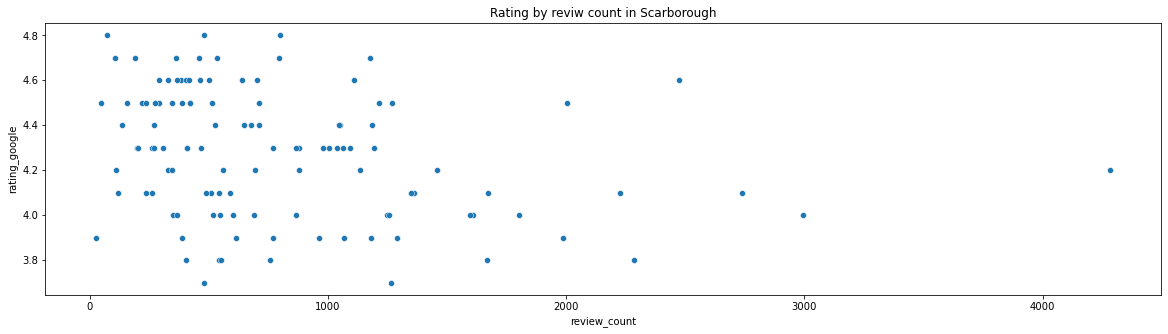

In [183]:
for city in cities:
    fig, ax = plt.subplots(figsize=(20,5));
    sns.scatterplot(x = 'review_count', y = 'rating_google', data= pd_1[pd_1.city == city],ax=ax)
    plt.title('Rating by review count in '+city)

In [44]:
set(pd_1.rating_google)

{2.5,
 2.6,
 2.7,
 2.9,
 3.0,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0}

In [148]:
# pd_1['ratingBins'] = [0]*len(pd_1)
# pd_1.drop(columns='ratingBins',inplace=True)
ratingBins = [];
for ind, row in pd_1.iterrows():
    if (row.rating_google <3) & (row.rating_google>=2):
        ratingBins.append(2)
    elif (row.rating_google <4) & (row.rating_google>=3):
        ratingBins.append(3)
    elif (row.rating_google <5) & (row.rating_google>=4):
        ratingBins.append(4)
    elif (row.rating_google ==5):
        ratingBins.append(5)
    else:
        ratingBins.append(1)
        
pd_1['ratingBins'] = ratingBins
# pd_1[(pd_1.rating_google <3) & (pd_1.rating_google>2)]['ratingBins'] = 1
# pd_1[(pd_1.rating_google <3) & (pd_1.rating_google>2)]
# # bin_3 = pd_1[(pd_1.rating_google <4) & (pd_1.rating_google>=3)]
# # bin_4 = pd_1[(pd_1.rating_google <5) & (pd_1.rating_google>=4)]
# # bin_5 = pd_1[(pd_1.rating_google ==5)]
# # bin_5

<ipython-input-148-0210f056d821>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_1['ratingBins'] = ratingBins


In [149]:
pd_1
# pd_1 = pd_1[pd_1.rating_google>.5]


,name,status,city,restType_1,restType_2,rating_google,review_count,ratingBins
0,Goodfellas Wood Oven Pizza,OPERATIONAL,York,Italian,Pizza,4.3,902,4
1,Moxie's Grill & Bar,OPERATIONAL,Toronto,Grill,Bar,4.0,1634,4
2,New Orleans Seafood & Steakhouse,OPERATIONAL,York,Steakhouse,Cajun & Creole,4.8,587,4
3,Scaramouche Restaurant,OPERATIONAL,Toronto,French,International,4.7,992,4
4,Alo,OPERATIONAL,Toronto,French,European,4.7,1353,4
...,...,...,...,...,...,...,...,...
2048,Perkins Restaurant & Bakery,OPERATIONAL,Pickering,American,Canadian,4.1,859,4
2049,Thai Room Liberty Village,CLOSED_PERMANENTLY,Toronto,Asian,Thai,4.0,123,4
2050,Pho Phuong Hoang,OPERATIONAL,Toronto,Asian,Vietnamese,3.7,13,3
2051,Jeon Ju Hyang Restaurant,OPERATIONAL,Scarborough,Asian,Korean,4.1,238,4


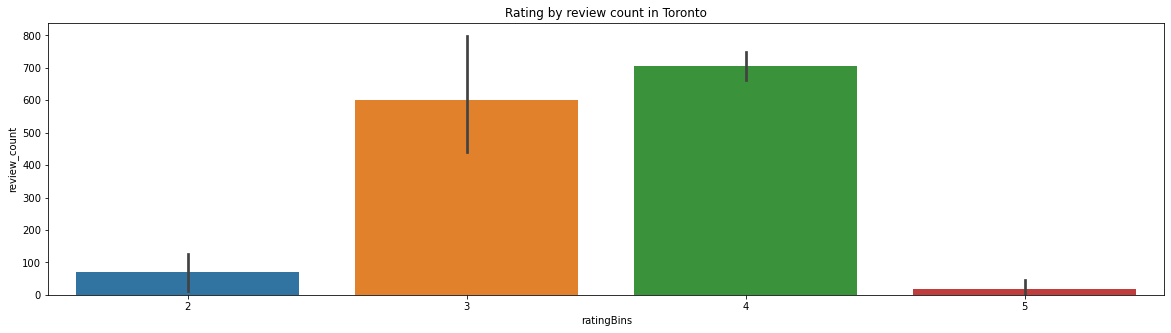

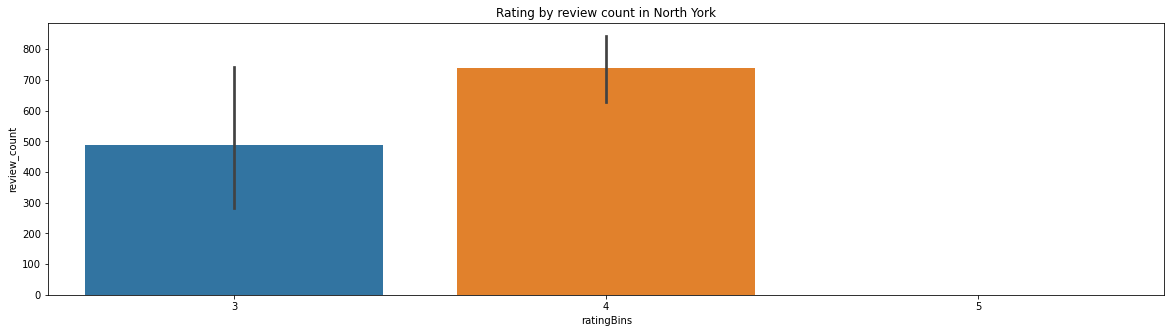

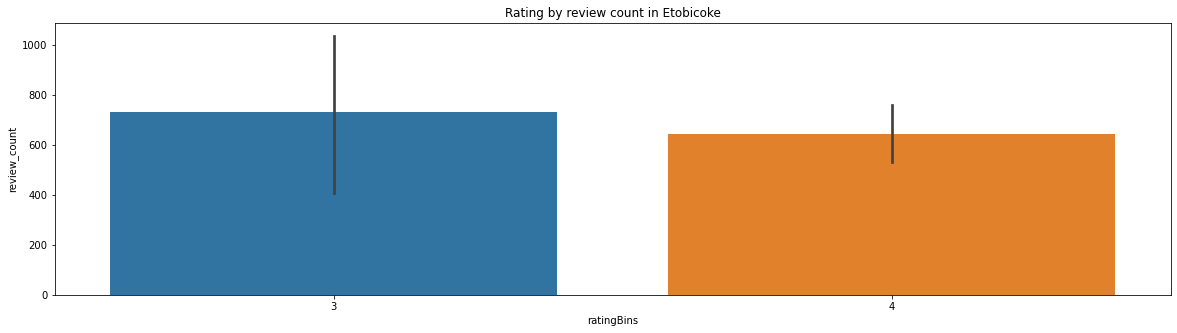

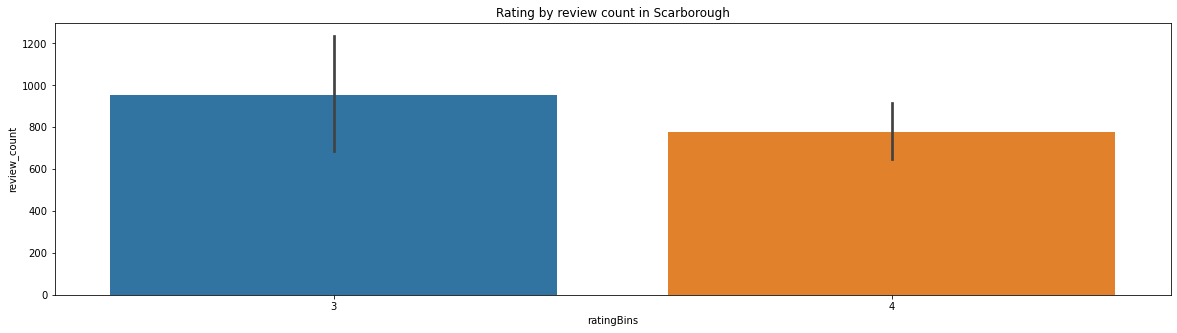

In [91]:
for city in cities:
    fig, ax = plt.subplots(figsize=(20,5));
    sns.barplot(x = 'ratingBins', y = 'review_count', data= pd_1[pd_1.city == city],ax=ax)
    plt.title('Rating by review count in '+city)

In [154]:
pd_1
for i in  ['$','$$ - $$$', '$$$$']:
    pd_1 = pd_1[pd_1['restType_1']!=i]#
set(pd_1.restType_1)

{'Afghani',
 'African',
 'American',
 'Arabic',
 'Argentinian',
 'Asian',
 'Austrian',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Cafe',
 'Cajun & Creole',
 'Canadian',
 'Caribbean',
 'Chinese',
 'Contemporary',
 'Deli',
 'Diner',
 'Dutch',
 'Eastern European',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast food',
 'French',
 'Fusion',
 'Gastropub',
 'German',
 'Greek',
 'Grill',
 'Healthy',
 'Indian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Latin',
 'Lebanese',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Moroccan',
 'Native American',
 'None',
 'Pakistani',
 'Persian',
 'Peruvian',
 'Philippine',
 'Pizza',
 'Polish',
 'Portuguese',
 'Pub',
 'Russian',
 'Seafood',
 'Singaporean',
 'Soups',
 'Spanish',
 'Sri Lankan',
 'Steakhouse',
 'Sushi',
 'Taiwanese',
 'Thai',
 'Turkish',
 'Ukrainian',
 'Uzbek',
 'Venezuelan',
 'Vietnamese',
 'Wine Bar'}

<AxesSubplot:xlabel='restType_1', ylabel='rating_google'>

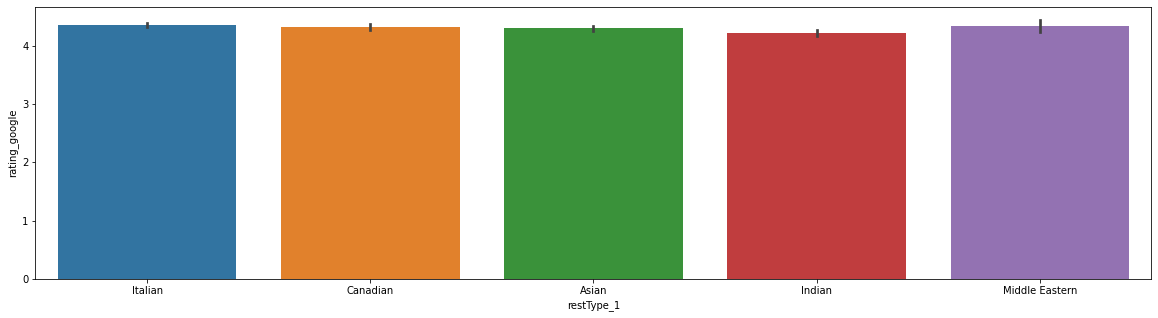

In [158]:
data = (pd_1[(pd_1.restType_1 == 'Canadian')|(pd_1.restType_1 == 'Italian')|(pd_1.restType_1 == 'Asian')|
             (pd_1.restType_1 == 'Middle Eastern')|(pd_1.restType_1 == 'Indian')]) #(pd_1.restType_2 == 'Canadian')|(pd_1.restType_2 == 'Italian')|(pd_1.restType_2 == 'Asian')|
#              (pd_1.restType_2 == 'Middle Eastern')|(pd_1.restType_2 == 'Indian')]
fig, ax = plt.subplots(figsize=(20,5));
sns.barplot(x = 'restType_1', y = 'rating_google', data= data,ax=ax)


<AxesSubplot:xlabel='restType_2', ylabel='rating_google'>

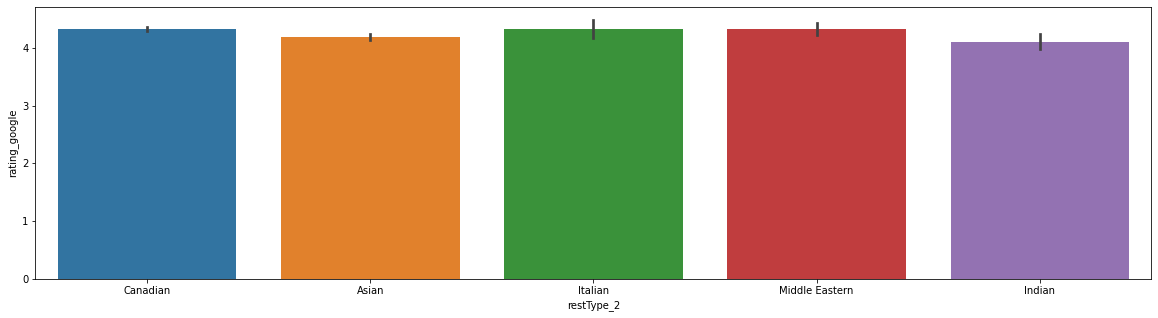

In [159]:
data = (pd_1[(pd_1.restType_2 == 'Canadian')|(pd_1.restType_2 == 'Italian')|(pd_1.restType_2 == 'Asian')|
             (pd_1.restType_2 == 'Middle Eastern')|(pd_1.restType_2 == 'Indian')]) #(pd_1.restType_2 == 'Canadian')|(pd_1.restType_2 == 'Italian')|(pd_1.restType_2 == 'Asian')|
#              (pd_1.restType_2 == 'Middle Eastern')|(pd_1.restType_2 == 'Indian')]
fig, ax = plt.subplots(figsize=(20,5));
sns.barplot(x = 'restType_2', y = 'rating_google', data= data,ax=ax)


In [157]:
data

,name,status,city,restType_1,restType_2,rating_google,review_count,ratingBins
0,Goodfellas Wood Oven Pizza,OPERATIONAL,York,Italian,Pizza,4.3,902,4
7,RASA,OPERATIONAL,Toronto,Canadian,International,4.6,591,4
8,PAI,OPERATIONAL,Toronto,Asian,Thai,4.6,8817,4
19,STELVIO,OPERATIONAL,Toronto,Italian,European,4.2,122,4
20,Rodney’s Oyster House,OPERATIONAL,Toronto,Seafood,Canadian,4.6,1786,4
...,...,...,...,...,...,...,...,...
2047,Gushi (Dundas W x Bathurst),OPERATIONAL,Toronto,Japanese,Asian,4.7,283,4
2048,Perkins Restaurant & Bakery,OPERATIONAL,Pickering,American,Canadian,4.1,859,4
2049,Thai Room Liberty Village,CLOSED_PERMANENTLY,Toronto,Asian,Thai,4.0,123,4
2050,Pho Phuong Hoang,OPERATIONAL,Toronto,Asian,Vietnamese,3.7,13,3


In [80]:
query = '''
SELECT rest.place_id,
       rev.review_id,
       rest.review_count,
       rest.rating_google
FROM   
    reviews as rev 
    INNER JOIN restaurants as rest ON rest.place_id = rev.place_id
    ; ''' #AND status = 'OPERATIONAL'
# responses:
#   0: review_id(TEXT)
#   1: responded(INTEGER)
#   2: text(TEXT)
#   3: place_id(TEXT)

# 
#        

c.execute(query)
c.fetchall()

[('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUR5c1pUZGJBEAE',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNLcjZlSUZnEAE',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNhcU9fSEpnEAE',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChdDSUhNMG9nS0VJQ0FnSUNxaFotMTJBRRAB',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChdDSUhNMG9nS0VJQ0FnSUNDbGEyWC1nRRAB',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChdDSUhNMG9nS0VJQ0FnSURxMk1PenJnRRAB',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNDM3BhUmNnEAE',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNxZ1A2dFZ3EAE',
  902,
  4.3),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNhdThlY1JREAE',
  902,
  4.3),
 ('ChIJedJ0GGI2K4g

In [81]:
# import pandas as pd
pd_rev = pd.read_sql(query, conn)
len(pd_rev)

378261

In [87]:
# number of restaurants that have has at least 1 review
len(set(pd_rev.place_id))

2122

In [82]:
query = '''
SELECT rest.place_id,
       rev.review_id,
       rest.review_count,
       rest.rating_google,
       resp.review_id as resp_rev_id
FROM   
    reviews as rev 
    INNER JOIN responses as resp ON rev.review_id = resp.review_id
    INNER JOIN restaurants as rest ON rest.place_id = rev.place_id
    ; ''' #AND status = 'OPERATIONAL'
# responses:
#   0: review_id(TEXT)
#   1: responded(INTEGER)
#   2: text(TEXT)
#   3: place_id(TEXT)

# 
#        

c.execute(query)
c.fetchall()

[('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUR5c1pUZGJBEAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUR5c1pUZGJBEAE'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNLcjZlSUZnEAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUNLcjZlSUZnEAE'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNhcU9fSEpnEAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUNhcU9fSEpnEAE'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChdDSUhNMG9nS0VJQ0FnSUNxaFotMTJBRRAB',
  902,
  4.3,
  'ChdDSUhNMG9nS0VJQ0FnSUNxaFotMTJBRRAB'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChdDSUhNMG9nS0VJQ0FnSUNDbGEyWC1nRRAB',
  902,
  4.3,
  'ChdDSUhNMG9nS0VJQ0FnSUNDbGEyWC1nRRAB'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChdDSUhNMG9nS0VJQ0FnSURxMk1PenJnRRAB',
  902,
  4.

In [83]:
# import pandas as pd
pd_rev2 = pd.read_sql(query, conn)
len(pd_rev2)

60842

In [88]:
# number of restaurants that have responded to at least 1 review
len(set(pd_rev2.place_id))

1295

In [84]:
pd_rev.columns

Index(['place_id', 'review_id', 'review_count', 'rating_google'], dtype='object')

In [85]:
pd_rev2.columns

Index(['place_id', 'review_id', 'review_count', 'rating_google',
       'resp_rev_id'],
      dtype='object')

In [86]:
# len(pd_rev[(pd_rev.responded ==1)]) #& (pd_rev.review_count>=200)])
len(pd_rev2)/len(pd_rev)

0.16084661120231797

In [78]:
len(pd_rev[(pd_rev.review_count>=200)])

53704

In [97]:
ratingBins = [];
for ind, row in pd_rev.iterrows():
    if (row.rating_google <3) & (row.rating_google>=2):
        ratingBins.append(2)
    elif (row.rating_google <4) & (row.rating_google>=3):
        ratingBins.append(3)
    elif (row.rating_google <5) & (row.rating_google>=4):
        ratingBins.append(4)
    elif (row.rating_google ==5):
        ratingBins.append(5)
    else:
        ratingBins.append(1)
        
pd_rev['ratingBins'] = ratingBins


In [98]:
# pd_rev2 = pd_rev#[pd_rev.responded ==1]
print(len(set(pd_rev2.place_id)))
print(len(set(pd_rev.place_id)))
response_rate = []
rating = []
ratingBins = []
for rest in set(pd_rev.place_id): #those that are responded
    response_rate.append(len(pd_rev2[(pd_rev2.place_id == rest)]))
    rating.append(pd_rev[pd_rev.place_id == rest]['rating_google'].to_list()[0])
    ratingBins.append(pd_rev[pd_rev.place_id == rest]['ratingBins'].to_list()[0])


1295
2122


In [99]:
new_df = pd.DataFrame(columns=['place_id','rating','response_rate'])
new_df['place_id']      = list(set(pd_rev.place_id))
new_df['response_rate'] = response_rate
new_df['rating']        = rating
new_df['ratingBins']    = ratingBins

In [100]:
new_df

,place_id,rating,response_rate,ratingBins
0,ChIJS6C7f3Y1K4gRv8LHK8_dSZE,4.7,24,4
1,ChIJdwyLw640K4gR-Ib4c1rH-2A,4.6,74,4
2,ChIJ21BO8wQxK4gRFVT-g8_3wPg,4.3,80,4
3,ChIJY8_cRMQ0K4gRrxlShS96nN0,4.0,5,4
4,ChIJlTy3aOKeLIgRBrhoxatkLWg,4.5,0,4
...,...,...,...,...
2117,ChIJe-NrzzowK4gRG0cskC7MCwQ,3.7,0,3
2118,ChIJAc4ay8E0K4gRlFr93DwkSdY,3.8,2,3
2119,ChIJv2izcL1JK4gRpBe_jg6Gekc,4.7,8,4
2120,ChIJ--SFklE0K4gRwPHFpNPlMHw,4.7,179,4


<AxesSubplot:xlabel='rating', ylabel='response_rate'>

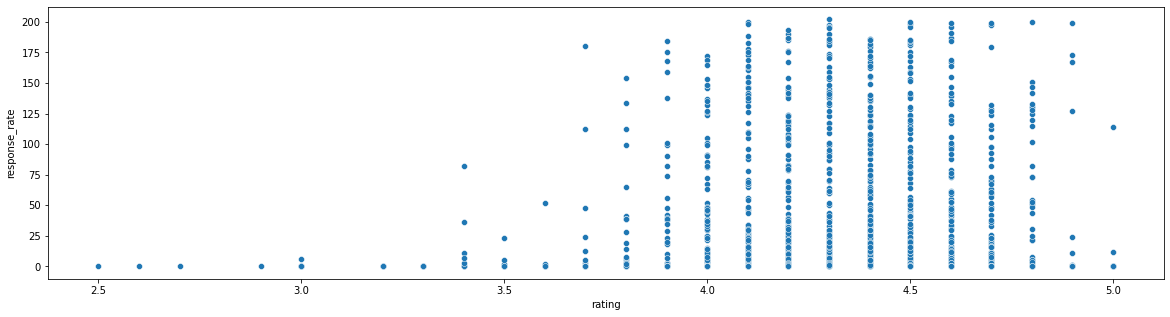

In [101]:
fig, ax = plt.subplots(figsize=(20,5));

sns.scatterplot(x = 'rating', y = 'response_rate', data= new_df, ax = ax)


<AxesSubplot:xlabel='ratingBins', ylabel='response_rate'>

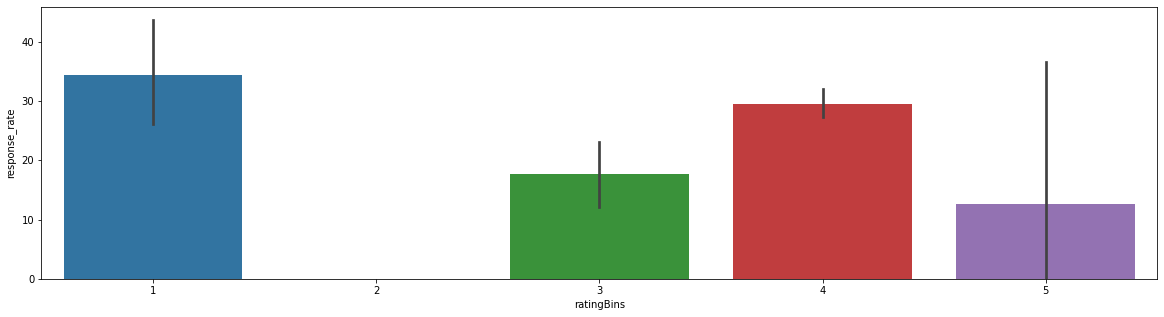

In [103]:
fig, ax = plt.subplots(figsize=(20,5));

sns.barplot(x = 'ratingBins', y = 'response_rate', data= new_df,ax=ax)


In [104]:
new_df[new_df.ratingBins == 1]

,place_id,rating,response_rate,ratingBins
22,ChIJBQg_mqY1K4gRf1_GKT1uV6A,NaN,0,1
40,ChIJZ1R--ZM0K4gR-reD-Fi3dyY,NaN,0,1
66,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,NaN,108,1
81,ChIJb31LZLE1K4gR3_2sUjTbWkk,NaN,0,1
82,ChIJfyxiuoDf1YkRtA02dHiyuvM,NaN,26,1
...,...,...,...,...
1981,ChIJB1WKQ8k1K4gRf_DS_0avq8g,NaN,100,1
2068,ChIJ28xvdyDM1IkRYz7fJh7RY9s,NaN,6,1
2081,ChIJ-VWEiU0XzEwRHspV9ClM7yE,NaN,72,1
2086,ChIJ9cnqpUEWK4gRL4ewRl0mG68,NaN,0,1


In [238]:
new_df

,place_id,rating,response_rate
0,ChIJ22FaNyo1K4gRYKnKHwoYftQ,4.2,0.575
1,ChIJpYqD9lw0K4gRn3gagNg4NDE,4.0,0.000
2,ChIJHZSWzfw3K4gR6yEgUNCzrY4,4.4,0.065
3,ChIJ___bZ-oyK4gRtqk12RRS7SU,4.5,0.840
4,ChIJ6yfoqPjN1IkRurZaTgGchUM,4.6,0.920
...,...,...,...
2117,ChIJoxorMeHQ1IkR8n1B7KV7D-k,4.1,0.000
2118,ChIJ6ZvKL50xK4gRPuiT6kvZdfw,4.3,0.125
2119,ChIJBbWAgCIxK4gRqdJDlP65FPk,4.3,0.050
2120,ChIJj1g_DbkzK4gR5yXEpTCeHkI,4.3,0.000


In [122]:
query = '''
SELECT rest.place_id,
       rest.name_google,
       web.url_googleMaps,
       rev.review_id,
       rev.text as revText,
       rest.review_count,
       rest.rating_google,
       resp.text as respText
FROM   
    reviews as rev 
    INNER JOIN responses as resp ON rev.review_id = resp.review_id
    INNER JOIN restaurants as rest ON rest.place_id = rev.place_id
    INNER JOIN web as web ON rev.place_id = web.place_id
    ; ''' #AND status = 'OPERATIONAL'
# responses:
#   0: review_id(TEXT)
#   1: responded(INTEGER)
#   2: text(TEXT)
#   3: place_id(TEXT)

# 
#        

c.execute(query)
c.fetchall()

[('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'Goodfellas Wood Oven Pizza',
  'https://www.google.com/maps/search/?api=1&query=Goodfellas Wood Oven Pizza,43.6482211%2C-79.4865442&query_place_id=ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE',
  "The calzone was tasty! Felt a bit heavy on the bread portion but If you order extra sauce, It's useful for dipping it in. They charged $3 for mushrooms to be added, which is a bit higher than the standard. The wine sangria fell a bit flat …",
  902,
  4.3,
  'Thank you for your feedback. We appreciate it and will share with staff. We do hope you will join us again sometime.'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'Goodfellas Wood Oven Pizza',
  'https://www.google.com/maps/search/?api=1&query=Goodfellas Wood Oven Pizza,43.6482211%2C-79.4865442&query_place_id=ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE',
  'By far, the best pizza I’ve ever had in Canada. We ordered the Spettacolare and it was really good. The st

In [123]:
# import pandas as pd
pd_rev3 = pd.read_sql(query, conn)
len(pd_rev3)

60842

In [124]:
pd_rev3.head()

,place_id,name_google,url_googleMaps,review_id,revText,review_count,rating_google,respText
0,ChIJedJ0GGI2K4gR6dco_CjRntY,Goodfellas Wood Oven Pizza,https://www.google.com/maps/search/?api=1&quer...,ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE,The calzone was tasty! Felt a bit heavy on the...,902,4.3,Thank you for your feedback. We appreciate it ...
1,ChIJedJ0GGI2K4gR6dco_CjRntY,Goodfellas Wood Oven Pizza,https://www.google.com/maps/search/?api=1&quer...,ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE,"By far, the best pizza I’ve ever had in Canada...",902,4.3,Grazie! Please join us again soon!
2,ChIJedJ0GGI2K4gR6dco_CjRntY,Goodfellas Wood Oven Pizza,https://www.google.com/maps/search/?api=1&quer...,ChZDSUhNMG9nS0VJQ0FnSUR5c1pUZGJBEAE,We had the Prosciutto e Rucola last night and ...,902,4.3,Grazie! Thank you for your kind words and supp...
3,ChIJedJ0GGI2K4gR6dco_CjRntY,Goodfellas Wood Oven Pizza,https://www.google.com/maps/search/?api=1&quer...,ChZDSUhNMG9nS0VJQ0FnSUNLcjZlSUZnEAE,Gluten free crust was surprisingly really good...,902,4.3,Amazing! We are thrilled you liked it!
4,ChIJedJ0GGI2K4gR6dco_CjRntY,Goodfellas Wood Oven Pizza,https://www.google.com/maps/search/?api=1&quer...,ChZDSUhNMG9nS0VJQ0FnSUNhcU9fSEpnEAE,This location is horrible! The waiter (Sania) ...,902,4.3,Thank you for your review. We appreciate the f...


In [128]:
pd_rev3[pd_rev3.place_id == 'ChIJm6MFI5Y0K4gRwCOxdqBfYh0']

,place_id,name_google,url_googleMaps,review_id,revText,review_count,rating_google,respText
57580,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChZDSUhNMG9nS0VJQ0FnSUNhek55eUhBEAE,We were the first customers to dine in this re...,1404,NaN,Thank you for your kind words Rigil! We hope t...
57581,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChZDSUhNMG9nS0VJQ0FnSURxbFBHU1h3EAE,An all vegan restaurant in the heart of Toront...,1404,NaN,Thank you for your kind words Solange! We hope...
57582,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChdDSUhNMG9nS0VJQ0FnSUNhZy1DNnFRRRAB,Amazing service!! But the food was a little pr...,1404,NaN,"Hi Winnie, I'm happy to hear you enjoyed your ..."
57583,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChdDSUhNMG9nS0VJQ0FnSUNhaVlMYXZ3RRAB,"I honestly used to love this place, but the pr...",1404,NaN,"Hi Emma, I'm sorry to hear you didn't enjoy yo..."
57584,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChdDSUhNMG9nS0VJQ0FnSURxNzhmUl93RRAB,I had a fantastic meal here. I couldn't believ...,1404,NaN,Thank you for your kind words Hema! We hope to...
...,...,...,...,...,...,...,...,...
57683,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChdDSUhNMG9nS0VJQ0FnSUNZdU5TYXZRRRAB,Food and service were excellent. I always have...,1404,NaN,"Thanks so much, Carlee! Hope to see you again ..."
57684,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChdDSUhNMG9nS0VJQ0FnSURZOXV2VjVRRRAB,Visited for the first time and fell in love in...,1404,NaN,"Hi Lily, Thank you so much for taking the time..."
57685,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChdDSUhNMG9nS0VJQ0FnSUNzMUppRXFnRRAB,Great spot for vegan eats with good service an...,1404,NaN,"Hi Kristine, thank you so much for the kind re..."
57686,ChIJm6MFI5Y0K4gRwCOxdqBfYh0,Fresh Restaurants,https://www.google.com/maps/search/?api=1&quer...,ChdDSUhNMG9nS0VJQ0FnSUNZNjdTZTBRRRAB,"The food is all wild and delicious. Beware, it...",1404,NaN,Thanks so much Maksym! Isn't our Buffalo Cauli...


In [131]:
set(pd_rev3[pd_rev3.rating_google.isna()]['name_google'])

{'7-Eleven',
 "Ali baba's Middle Eastern Cuisine",
 'August 8 Brampton',
 'Bar Mercurio',
 "Barberian's Butcher Shop",
 'Big Slice (Dufferin & St. Clair)',
 'Big Smoke Burger',
 'Cafe Landwer',
 'Chantecler Restaurant',
 'Chatime',
 'Church Street Espresso',
 'Cibo Wine Bar Yorkville',
 'Citrus Medical Centre - Lake Shore',
 "Craig's Cookies",
 'Crocodile Rock - Bar - Night Club',
 'Demetres Danforth',
 'Doggies And Bubbles',
 "Double D's Lake Shore",
 'EDO-ko',
 'Eggsmart',
 'FLOCK rotisserie + greens',
 'Fancy Franks',
 'First Choice Restaurant',
 "Fresco's Fish and Chips",
 'Fresh Restaurants',
 'Fuwa Fuwa Japanese Pancakes',
 'Habitant',
 "Harvey's",
 'Ikkousha Ramen Toronto',
 'JINYA Ramen Bar - Washington DC',
 'Live Organic Food Bar',
 'Marzitelli',
 'Michel’s Bakery Café',
 "Montana's",
 "Moxie's Grill & Bar",
 'My Roti Place/My Dosa Place',
 'North of Brooklyn Pizzeria',
 'Panago Pizza',
 'Paramount Middle Eastern Kitchen',
 'Pho 88 Restaurant',
 'Pita Land',
 'Pizza Pizza',
 

In [133]:
pd_rev3[pd_rev3.name_google=='Bar Mercurio'].iloc[0]

place_id                                ChIJS2ZJB700K4gRuIXqgo0WLRE
name_google                                            Bar Mercurio
url_googleMaps    https://www.google.com/maps/search/?api=1&quer...
review_id                      ChdDSUhNMG9nS0VJQ0FnSUQ4dWMyTW9nRRAB
revText           Strongly recommend  ❤️ Enjoying the tasty and ...
review_count                                                    228
rating_google                                                   NaN
respText                                                 Thank-you!
Name: 57929, dtype: object

In [142]:
pd_1.columns

Index(['name', 'status', 'city', 'restType_1', 'restType_2', 'rating_google',
       'review_count'],
      dtype='object')

In [143]:
pd_rev3.columns

Index(['place_id', 'name_google', 'url_googleMaps', 'review_id', 'revText',
       'review_count', 'rating_google', 'respText'],
      dtype='object')

In [145]:
pd_rev.columns

Index(['place_id', 'review_id', 'review_count', 'rating_google', 'ratingBins'], dtype='object')

In [4]:
query = '''
SELECT rest.place_id,
       rev.review_id,
       rest.review_count,
       rest.rating_google,
       resp.review_id as resp_rev_id,
       cuisine.category_tripAdvisor_1 as resType_1,
       cuisine.category_tripAdvisor_2 as resType_2
FROM   
    reviews as rev 
    INNER JOIN responses as resp ON rev.review_id = resp.review_id
    INNER JOIN restaurants as rest ON rest.place_id = rev.place_id
    INNER JOIN cuisine as cuisine ON cuisine.place_id = rev.place_id

    ; ''' #AND status = 'OPERATIONAL'
# responses:
#   0: review_id(TEXT)
#   1: responded(INTEGER)
#   2: text(TEXT)
#   3: place_id(TEXT)

# 
#        

c.execute(query)
c.fetchall()

[('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE',
  'Italian',
  'Pizza'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE',
  'Italian',
  'Pizza'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUR5c1pUZGJBEAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUR5c1pUZGJBEAE',
  'Italian',
  'Pizza'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNLcjZlSUZnEAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUNLcjZlSUZnEAE',
  'Italian',
  'Pizza'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChZDSUhNMG9nS0VJQ0FnSUNhcU9fSEpnEAE',
  902,
  4.3,
  'ChZDSUhNMG9nS0VJQ0FnSUNhcU9fSEpnEAE',
  'Italian',
  'Pizza'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChdDSUhNMG9nS0VJQ0FnSUNxaFotMTJBRRAB',
  902,
  4.3,
  'ChdDSUhNMG9nS0VJQ0FnSUNxaFotMTJBRRAB',
  'Italian',
  'Pizza'),
 ('ChIJedJ0GGI2K4gR6dco_CjRntY',
  'ChdDSUhNMG9nS0VJQ0FnSUNDbGEyWC1nRRAB',

In [5]:
import pandas as pd
pd_rev3 = pd.read_sql(query, conn)
len(pd_rev3)

60842

In [6]:
pd_rev3.head()

,place_id,review_id,review_count,rating_google,resp_rev_id,resType_1,resType_2
0,ChIJedJ0GGI2K4gR6dco_CjRntY,ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE,902,4.3,ChZDSUhNMG9nS0VJQ0FnSUNheHZyeFN3EAE,Italian,Pizza
1,ChIJedJ0GGI2K4gR6dco_CjRntY,ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE,902,4.3,ChZDSUhNMG9nS0VJQ0FnSUNxMVlUTWZBEAE,Italian,Pizza
2,ChIJedJ0GGI2K4gR6dco_CjRntY,ChZDSUhNMG9nS0VJQ0FnSUR5c1pUZGJBEAE,902,4.3,ChZDSUhNMG9nS0VJQ0FnSUR5c1pUZGJBEAE,Italian,Pizza
3,ChIJedJ0GGI2K4gR6dco_CjRntY,ChZDSUhNMG9nS0VJQ0FnSUNLcjZlSUZnEAE,902,4.3,ChZDSUhNMG9nS0VJQ0FnSUNLcjZlSUZnEAE,Italian,Pizza
4,ChIJedJ0GGI2K4gR6dco_CjRntY,ChZDSUhNMG9nS0VJQ0FnSUNhcU9fSEpnEAE,902,4.3,ChZDSUhNMG9nS0VJQ0FnSUNhcU9fSEpnEAE,Italian,Pizza


In [7]:
ratingBins = [];
for ind, row in pd_rev3.iterrows():
    if (row.rating_google <3) & (row.rating_google>=2):
        ratingBins.append(2)
    elif (row.rating_google <4) & (row.rating_google>=3):
        ratingBins.append(3)
    elif (row.rating_google <5) & (row.rating_google>=4):
        ratingBins.append(4)
    elif (row.rating_google ==5):
        ratingBins.append(5)
    else:
        ratingBins.append(1)
        
pd_rev3['ratingBins'] = ratingBins


In [16]:
# pd_rev2 = pd_rev#[pd_rev.responded ==1]
print(len(set(pd_rev3.place_id)))
# print(len(set(pd_rev.place_id)))
response_rate = []
rating = []
ratingBins = []
resType_1  = []
resType_2 = []
for rest in set(pd_rev3.place_id): #those that are responded
    response_rate.append(len(pd_rev3[(pd_rev3.place_id == rest)]))
    rating.append(pd_rev3[pd_rev3.place_id == rest]['rating_google'].to_list()[0])
    ratingBins.append(pd_rev3[pd_rev3.place_id == rest]['ratingBins'].to_list()[0])
    resType_1.append(pd_rev3[pd_rev3.place_id == rest]['resType_1'].to_list()[0])
    resType_2.append(pd_rev3[pd_rev3.place_id == rest]['resType_2'].to_list()[0])


1295


In [15]:
# pd_rev3[pd_rev3.place_id == rest]['resType_1'].to_list()[0]

'American'

In [18]:
new_df = pd.DataFrame(columns=['place_id','rating','response_rate','resType_1','resType_2'])
new_df['place_id']      = list(set(pd_rev3.place_id))
new_df['response_rate'] = response_rate
new_df['rating']        = rating
new_df['ratingBins']    = ratingBins
new_df['resType_1']     = resType_1
new_df['resType_2']     = resType_2

In [19]:
new_df

,place_id,rating,response_rate,resType_1,resType_2,ratingBins
0,ChIJBxFpnTDL1IkReXsnWnu0zBQ,4.6,79,American,Diner,4
1,ChIJXS0KOsI0K4gRRR26u812mnA,4.5,3,Cafe,Canadian,4
2,ChIJddMGbaU0K4gR9_K5VZ45XBE,4.0,38,Sushi,Japanese,4
3,ChIJp36b-pkyK4gRz2eAjUjARTY,4.6,4,French,European,4
4,ChIJYV7mKRfT1IkR5zRnl1hAT-s,4.8,200,Lebanese,Mediterranean,4
...,...,...,...,...,...,...
1290,ChIJw0UhZ1M2K4gR6graReCk694,4.1,15,Italian,Pizza,4
1291,ChIJw89ErR42K4gRvpZZeZ6i59A,4.4,182,Indian,None,4
1292,ChIJ-2vwfrE1K4gRH74617i2J-k,4.5,196,Asian,Tibetan,4
1293,ChIJE21UDa00K4gRJ4nBqo3AEIQ,4.1,3,$$ - $$$,None,4


<AxesSubplot:xlabel='resType_1', ylabel='response_rate'>

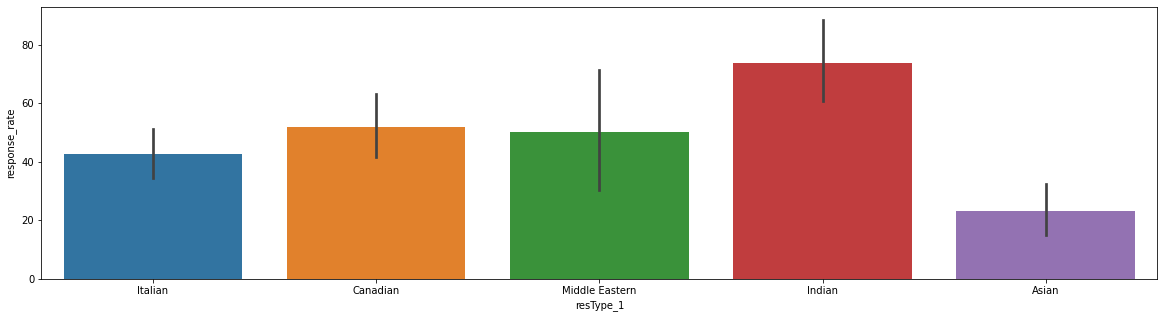

In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

data = (new_df[(new_df.resType_1 == 'Canadian')|(new_df.resType_1 == 'Italian')|(new_df.resType_1 == 'Asian')|
             (new_df.resType_1 == 'Middle Eastern')|(new_df.resType_1 == 'Indian')]) #(pd_1.restType_2 == 'Canadian')|(pd_1.restType_2 == 'Italian')|(pd_1.restType_2 == 'Asian')|
#              (pd_1.restType_2 == 'Middle Eastern')|(pd_1.restType_2 == 'Indian')]
fig, ax = plt.subplots(figsize=(20,5));
sns.barplot(x = 'resType_1', y = 'response_rate', data= data,ax=ax)


<AxesSubplot:xlabel='resType_2', ylabel='response_rate'>

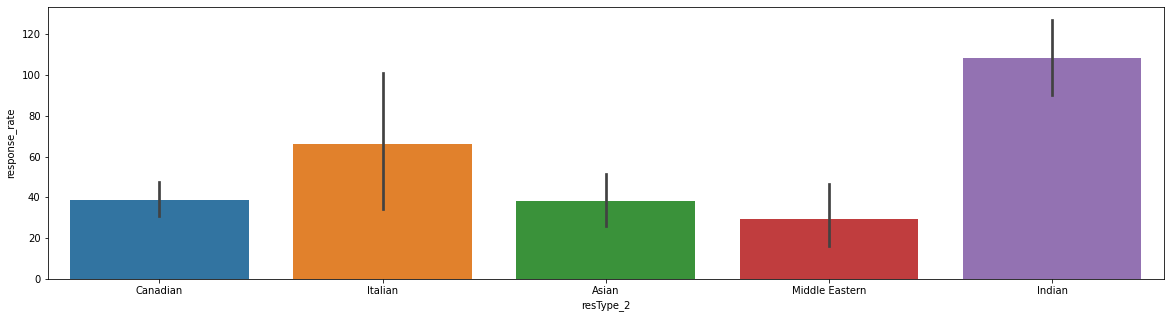

In [29]:
data = (new_df[(new_df.resType_2 == 'Canadian')|(new_df.resType_2 == 'Italian')|(new_df.resType_2 == 'Asian')|
             (new_df.resType_2 == 'Middle Eastern')|(new_df.resType_2 == 'Indian')]) #(pd_1.restType_2 == 'Canadian')|(pd_1.restType_2 == 'Italian')|(pd_1.restType_2 == 'Asian')|
#              (pd_1.restType_2 == 'Middle Eastern')|(pd_1.restType_2 == 'Indian')]
fig, ax = plt.subplots(figsize=(20,5));
sns.barplot(x = 'resType_2', y = 'response_rate', data= data,ax=ax)


<AxesSubplot:xlabel='resType_1', ylabel='response_rate'>

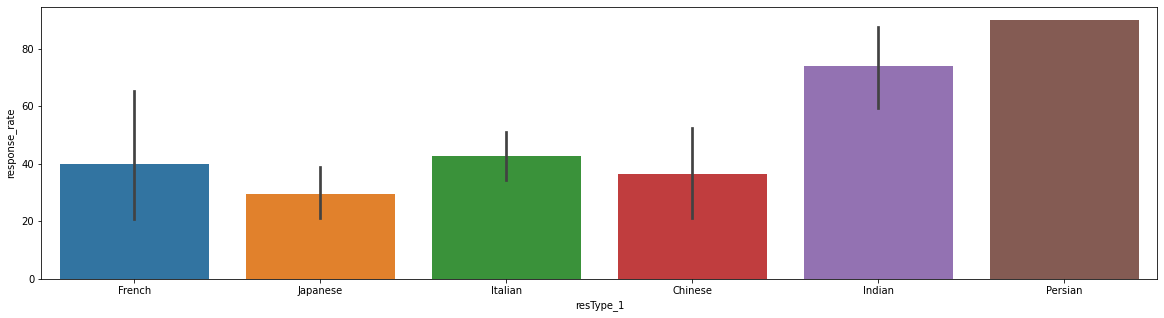

In [30]:
data = (new_df[(new_df.resType_1 == 'French')|(new_df.resType_1 == 'Italian')|(new_df.resType_1 == 'Japanese')|
             (new_df.resType_1 == 'Persian')|(new_df.resType_1 == 'Indian')|(new_df.resType_1 == 'Chinese')]) #(pd_1.restType_2 == 'Canadian')|(pd_1.restType_2 == 'Italian')|(pd_1.restType_2 == 'Asian')|
#              (pd_1.restType_2 == 'Middle Eastern')|(pd_1.restType_2 == 'Indian')]
fig, ax = plt.subplots(figsize=(20,5));
sns.barplot(x = 'resType_1', y = 'response_rate', data= data,ax=ax)


In [39]:
new_df[new_df.resType_1=='Persian']

,place_id,rating,response_rate,resType_1,resType_2,ratingBins
1006,ChIJcSmnbLE0K4gRwkEPdL8g0lI,4.3,90,Persian,Middle Eastern,4


In [40]:
new_df[new_df.resType_2=='Persian']

,place_id,rating,response_rate,resType_1,resType_2,ratingBins
29,ChIJ926TUOE0K4gRr4zJc6URv5Q,4.0,11,Middle Eastern,Persian,4
174,ChIJH696FwItK4gRd85dywPdpYo,3.9,74,Middle Eastern,Persian,3
183,ChIJryPxdrQ0K4gRCvPvr24FhjI,4.2,106,Middle Eastern,Persian,4
301,ChIJUZgW2ibN1IkRRYQbcBfpg7g,4.6,62,Middle Eastern,Persian,4
557,ChIJK5r85v0sK4gRuSRjYeP8xG0,3.8,41,Middle Eastern,Persian,3
565,ChIJc2R_7FA0K4gRzDBLSN-ncf8,4.5,2,Middle Eastern,Persian,4
573,ChIJiQ7xxxYzK4gRidUAJpzPU1E,4.0,25,Middle Eastern,Persian,4
649,ChIJG1zf3Os0K4gRGvUia4Zrqno,4.5,1,Middle Eastern,Persian,4
847,ChIJyYRRgpzS1IkRu_iOojNS5p8,4.2,2,Middle Eastern,Persian,4


<AxesSubplot:xlabel='resType_2', ylabel='response_rate'>

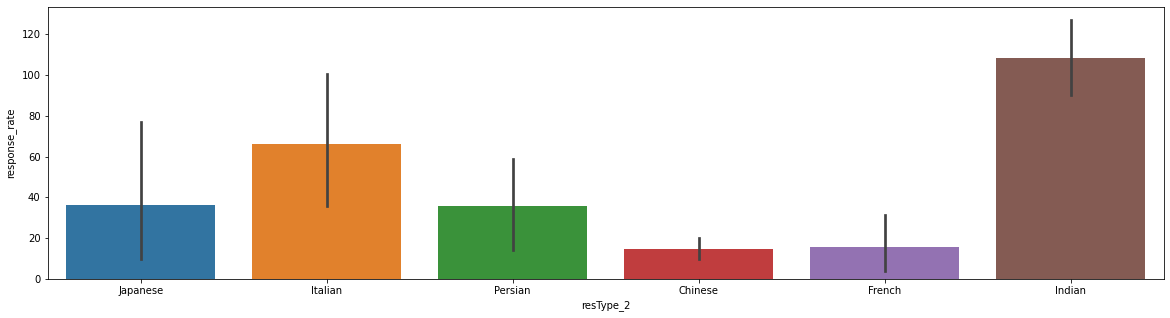

In [31]:
data = (new_df[(new_df.resType_2 == 'French')|(new_df.resType_2 == 'Italian')|(new_df.resType_2 == 'Japanese')|
             (new_df.resType_2 == 'Persian')|(new_df.resType_2 == 'Indian')|(new_df.resType_2 == 'Chinese')]) #(pd_1.restType_2 == 'Canadian')|(pd_1.restType_2 == 'Italian')|(pd_1.restType_2 == 'Asian')|
#              (pd_1.restType_2 == 'Middle Eastern')|(pd_1.restType_2 == 'Indian')]
fig, ax = plt.subplots(figsize=(20,5));
sns.barplot(x = 'resType_2', y = 'response_rate', data= data,ax=ax)
